# Importing packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

To Run the code segments below. Create a folder named "Kaggle" in your Google Drive, and add the csv file 'real_estate_db.csv' to the folder. Obtain the real_estate dataset from Kaggle (https://www.kaggle.com/goldenoakresearch/us-acs-mortgage-equity-loans-rent-statistics) 

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


# Importing and exploring the dataset




In [ ]:
df = pd.read_csv('real_estate_db.csv', encoding = "ISO-8859-1")

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39030 entries, 0 to 39029
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          39030 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     39030 non-null  int64  
 3   COUNTYID                     39030 non-null  int64  
 4   STATEID                      39030 non-null  int64  
 5   state                        39030 non-null  object 
 6   state_ab                     39030 non-null  object 
 7   city                         39030 non-null  object 
 8   place                        39030 non-null  object 
 9   type                         39030 non-null  object 
 10  primary                      39030 non-null  object 
 11  zip_code                     39030 non-null  int64  
 12  area_code                    39030 non-null  int64  
 13  lat             

In [ ]:
df.shape

(39030, 80)

In [ ]:
df1 = df[['state_ab', 'city', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_median', 'rent_gt_50', 'hi_median', 'hc_median',
          'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'hs_degree', 'hs_degree_male', 'hs_degree_female',
          'hc_mortgage_median', 'married', 'separated', 'divorced']]

In [ ]:
df1.shape

(39030, 21)

In [ ]:
df1.head()

,state_ab,city,AWater,pop,male_pop,female_pop,rent_median,rent_gt_50,hi_median,hc_median,home_equity_second_mortgage,second_mortgage,home_equity,debt,hs_degree,hs_degree_male,hs_degree_female,hc_mortgage_median,married,separated,divorced
0,AK,Unalaska,3101986247,4619,2725,1894,1405.0,0.12432,92807.0,776.0,0.00469,0.01408,0.02817,0.72770,0.82841,0.82784,0.82940,2283.0,0.47388,0.03443,0.09802
1,AK,Eagle River,1859309,3727,1780,1947,2351.0,0.00000,119141.0,742.0,0.03609,0.06078,0.07407,0.75689,0.94090,0.97253,0.91503,2306.0,0.52381,0.00782,0.13575
2,AK,Jber,66534601,8736,5166,3570,2089.0,0.32999,57976.0,810.0,0.00000,0.00000,0.00000,0.00000,0.99097,0.99661,0.98408,NaN,0.50459,0.01000,0.01838
3,AK,Anchorage,9966854,1941,892,1049,914.0,0.20253,48230.0,558.0,0.00000,0.00000,0.04469,0.78212,0.89274,0.94301,0.84871,2359.0,0.44428,0.00000,0.21563
4,AK,Anchorage,0,5981,3076,2905,1222.0,0.11276,66459.0,717.0,0.04083,0.04083,0.08514,0.67246,0.95351,0.96060,0.94669,1678.0,0.51034,0.06731,0.08711


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39030 entries, 0 to 39029
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state_ab                     39030 non-null  object 
 1   city                         39030 non-null  object 
 2   AWater                       39030 non-null  int64  
 3   pop                          39030 non-null  int64  
 4   male_pop                     39030 non-null  int64  
 5   female_pop                   39030 non-null  int64  
 6   rent_median                  38568 non-null  float64
 7   rent_gt_50                   38567 non-null  float64
 8   hi_median                    38640 non-null  float64
 9   hc_median                    38140 non-null  float64
 10  home_equity_second_mortgage  38353 non-null  float64
 11  second_mortgage              38353 non-null  float64
 12  home_equity                  38353 non-null  float64
 13  debt            

# Data Cleaning

In [ ]:
df1.isnull().sum()

state_ab                         0
city                             0
AWater                           0
pop                              0
male_pop                         0
female_pop                       0
rent_median                    462
rent_gt_50                     463
hi_median                      390
hc_median                      890
home_equity_second_mortgage    677
second_mortgage                677
home_equity                    677
debt                           677
hs_degree                      275
hs_degree_male                 289
hs_degree_female               328
hc_mortgage_median             841
married                        275
separated                      275
divorced                       275
dtype: int64

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.reset_index(inplace = True)

In [ ]:
df1.shape

(37941, 22)

# Updated Data Exploration

In [ ]:
df1.drop('index', axis = 'columns', inplace = True)
df1.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,AWater,pop,male_pop,female_pop,rent_median,rent_gt_50,hi_median,hc_median,home_equity_second_mortgage,second_mortgage,home_equity,debt,hs_degree,hs_degree_male,hs_degree_female,hc_mortgage_median,married,separated,divorced
count,3.794100e+04,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000
mean,6.141655e+06,4385.865291,2153.415935,2232.449356,1006.505891,0.254204,57745.794049,513.302338,0.025675,0.029990,0.101119,0.630547,0.858934,0.852447,0.865411,1551.417965,0.511838,0.019032,0.100516
std,2.036390e+08,2084.145218,1046.300000,1070.728616,440.220830,0.136123,29025.657083,232.743922,0.027653,0.030713,0.065589,0.149353,0.110580,0.118587,0.109824,652.926520,0.131452,0.020029,0.047636
min,0.000000e+00,38.000000,8.000000,28.000000,107.000000,0.000000,6544.000000,53.000000,0.000000,0.000000,0.000000,0.013590,0.186520,0.125980,0.199710,251.000000,0.002200,0.000000,0.000000
25%,0.000000e+00,2956.000000,1436.000000,1497.000000,703.000000,0.160840,37591.000000,360.000000,0.005560,0.008120,0.050510,0.540100,0.808380,0.795390,0.818480,1067.000000,0.429690,0.004650,0.066470
50%,2.729500e+04,4106.000000,2004.000000,2089.000000,896.000000,0.243020,51428.000000,448.000000,0.018830,0.022770,0.095240,0.648560,0.888660,0.883260,0.895330,1370.000000,0.528450,0.013590,0.095420
75%,5.224790e+05,5470.000000,2684.000000,2789.000000,1196.000000,0.336360,70852.000000,600.000000,0.037210,0.043020,0.143810,0.737090,0.939250,0.940260,0.944140,1877.000000,0.606570,0.027490,0.128920
max,2.453228e+10,53812.000000,26562.000000,27250.000000,3972.000000,1.000000,253857.000000,1702.000000,0.437500,0.608700,0.687500,0.979920,1.000000,1.000000,1.000000,4472.000000,1.000000,0.275000,0.484850


# High School Degree mean proportion for the top 10 states

In [ ]:
df1.groupby('state_ab').hs_degree.mean().sort_values(ascending = False).head(10)

state_ab
MT    0.922446
WY    0.921960
MN    0.917056
NH    0.915837
HI    0.915753
AK    0.915536
VT    0.913276
ME    0.911866
UT    0.910027
CO    0.907641
Name: hs_degree, dtype: float64

# Plotting the High School mean proportion for the top 20 states

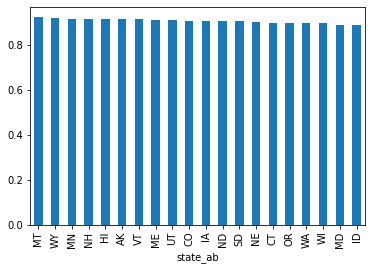

In [ ]:
df1.groupby('state_ab').hs_degree.mean().sort_values(ascending = False).head(20).plot(kind = 'bar')

# Histogram of frequency high school degree proportion (overall, men and women)

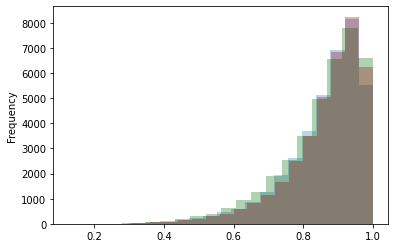

In [ ]:
df1.hs_degree.plot(kind = 'hist', bins = 20, alpha = .3)
df1.hs_degree_male.plot(kind = 'hist', bins = 20, alpha = .3, color = 'darkgreen')
df1.hs_degree_female.plot(kind = 'hist', bins = 20, alpha = .3, color = 'darkred')
plt.show()

# Scatter Plot of high school degree proportion vs household mortgage median payments

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


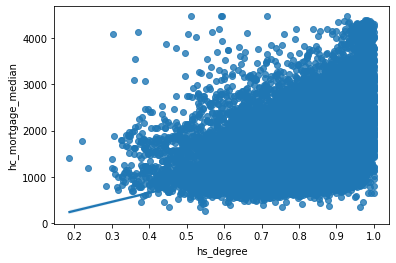

In [ ]:
sb.regplot('hs_degree', 'hc_mortgage_median', data = df1)

# Exploring correlations through a matrix of scatter plots

In [ ]:
df_sample = df1.sample(n=2500).reset_index()
df_sample.drop('index', axis = 'columns', inplace = True)

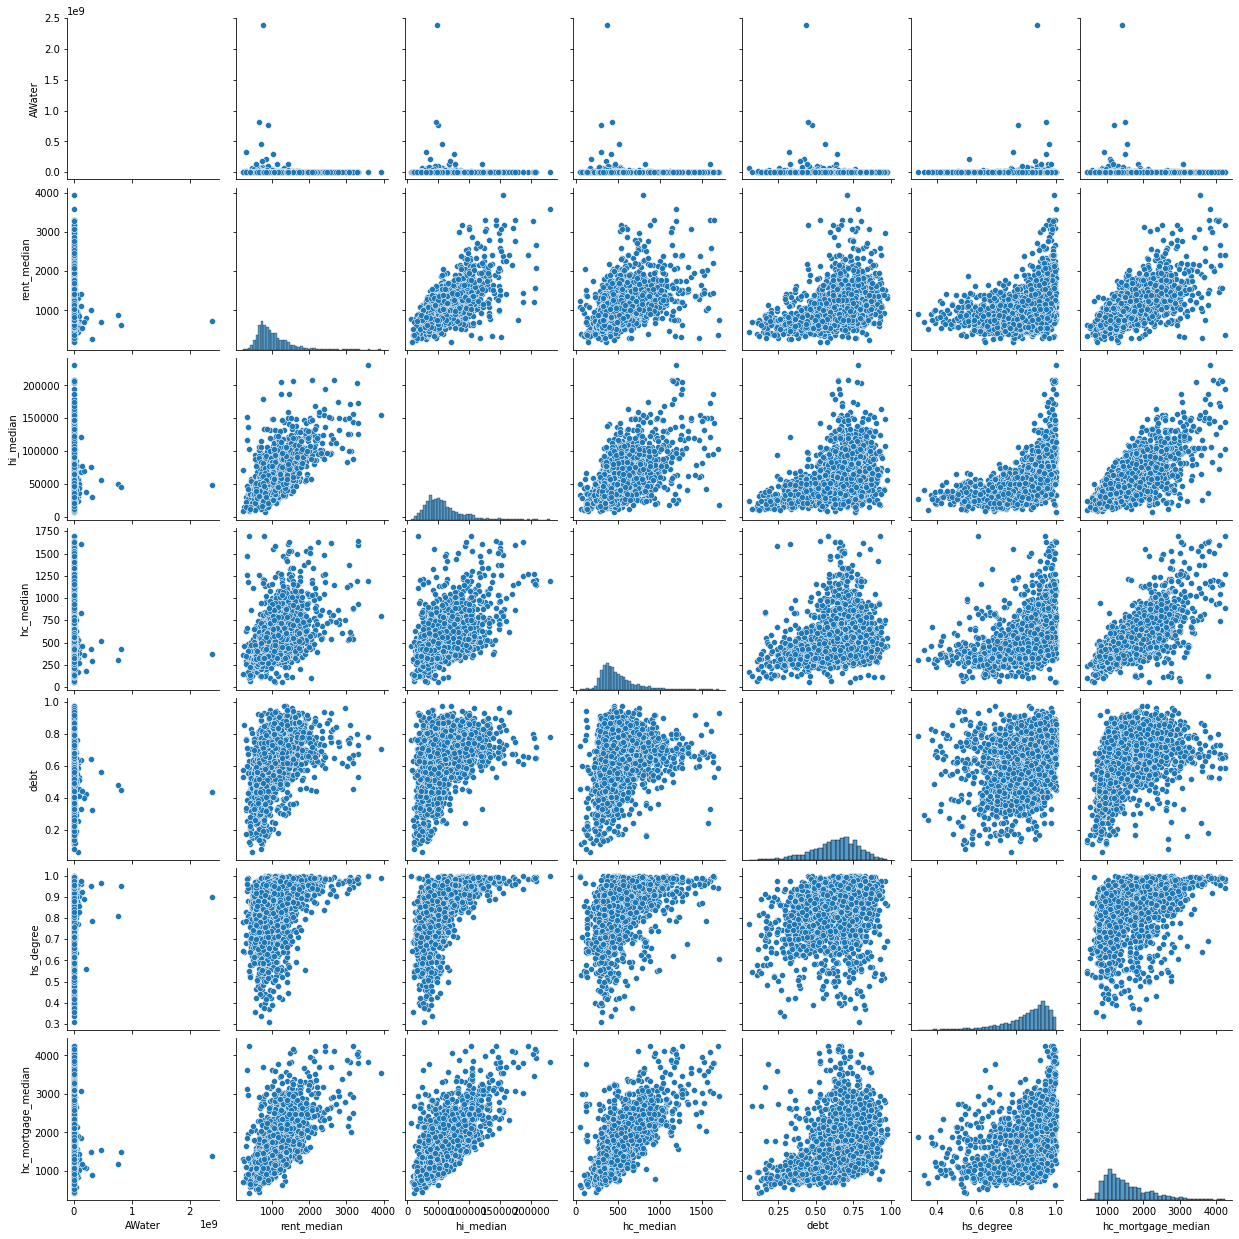

In [ ]:
sb.pairplot(data = df_sample[['AWater','rent_median', 'hi_median', 'hc_median',
                              'debt', 'hs_degree','hc_mortgage_median',]])

# Prediction Models

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df_sample.loc[:,'hi_level'] = 'a'

## Correlation Matrix

In [ ]:
df_sample.corr()

,AWater,pop,male_pop,female_pop,rent_median,rent_gt_50,hi_median,hc_median,home_equity_second_mortgage,second_mortgage,home_equity,debt,hs_degree,hs_degree_male,hs_degree_female,hc_mortgage_median,married,separated,divorced
AWater,1.000000,-0.038173,-0.034373,-0.040922,-0.037938,-0.029725,-0.013025,-0.027030,-0.039144,-0.030974,-0.039619,-0.069858,0.016436,0.008687,0.024580,-0.020283,0.031422,-0.010193,0.035333
pop,-0.038173,1.000000,0.987378,0.988298,0.161985,-0.067459,0.162337,0.015686,0.102089,0.100370,0.088599,0.248608,0.067931,0.071714,0.060742,0.087016,0.166650,-0.076245,-0.161919
male_pop,-0.034373,0.987378,1.000000,0.951665,0.164023,-0.077090,0.168121,0.008595,0.101862,0.099641,0.088042,0.246972,0.054757,0.057707,0.052503,0.089974,0.145927,-0.077398,-0.156132
female_pop,-0.040922,0.988298,0.951665,1.000000,0.156159,-0.056574,0.152894,0.022141,0.099872,0.098678,0.087022,0.244253,0.078998,0.083494,0.067228,0.082092,0.182632,-0.073316,-0.163628
rent_median,-0.037938,0.161985,0.164023,0.156159,1.000000,-0.045223,0.701168,0.526140,0.160695,0.188851,0.411178,0.444856,0.302383,0.314045,0.269550,0.709231,0.206869,-0.150176,-0.349361
rent_gt_50,-0.029725,-0.067459,-0.077090,-0.056574,-0.045223,1.000000,-0.315953,-0.081875,0.003767,-0.002223,-0.085521,-0.045607,-0.295293,-0.286042,-0.289701,-0.056445,-0.352260,0.184094,0.047660
hi_median,-0.013025,0.162337,0.168121,0.152894,0.701168,-0.315953,1.000000,0.608074,0.114399,0.138730,0.493545,0.432447,0.557729,0.554724,0.526920,0.721410,0.530929,-0.328309,-0.403313
hc_median,-0.027030,0.015686,0.008595,0.022141,0.526140,-0.081875,0.608074,1.000000,0.044614,0.071273,0.371803,0.279635,0.357130,0.364614,0.326495,0.747839,0.180160,-0.170746,-0.325080
home_equity_second_mortgage,-0.039144,0.102089,0.101862,0.099872,0.160695,0.003767,0.114399,0.044614,1.000000,0.935273,0.524299,0.360244,0.073818,0.088640,0.055776,0.115642,0.000964,-0.002422,-0.042486
second_mortgage,-0.030974,0.100370,0.099641,0.098678,0.188851,-0.002223,0.138730,0.071273,0.935273,1.000000,0.518800,0.389633,0.074585,0.085974,0.059351,0.151290,0.000585,-0.015853,-0.066922


## Correlation Matrix with color gradient

In [ ]:
corr = df_sample.corr()
corr.style.background_gradient(cmap='coolwarm')

,AWater,pop,male_pop,female_pop,rent_median,rent_gt_50,hi_median,hc_median,home_equity_second_mortgage,second_mortgage,home_equity,debt,hs_degree,hs_degree_male,hs_degree_female,hc_mortgage_median,married,separated,divorced
AWater,1.000000,-0.038173,-0.034373,-0.040922,-0.037938,-0.029725,-0.013025,-0.027030,-0.039144,-0.030974,-0.039619,-0.069858,0.016436,0.008687,0.024580,-0.020283,0.031422,-0.010193,0.035333
pop,-0.038173,1.000000,0.987378,0.988298,0.161985,-0.067459,0.162337,0.015686,0.102089,0.100370,0.088599,0.248608,0.067931,0.071714,0.060742,0.087016,0.166650,-0.076245,-0.161919
male_pop,-0.034373,0.987378,1.000000,0.951665,0.164023,-0.077090,0.168121,0.008595,0.101862,0.099641,0.088042,0.246972,0.054757,0.057707,0.052503,0.089974,0.145927,-0.077398,-0.156132
female_pop,-0.040922,0.988298,0.951665,1.000000,0.156159,-0.056574,0.152894,0.022141,0.099872,0.098678,0.087022,0.244253,0.078998,0.083494,0.067228,0.082092,0.182632,-0.073316,-0.163628
rent_median,-0.037938,0.161985,0.164023,0.156159,1.000000,-0.045223,0.701168,0.526140,0.160695,0.188851,0.411178,0.444856,0.302383,0.314045,0.269550,0.709231,0.206869,-0.150176,-0.349361
rent_gt_50,-0.029725,-0.067459,-0.077090,-0.056574,-0.045223,1.000000,-0.315953,-0.081875,0.003767,-0.002223,-0.085521,-0.045607,-0.295293,-0.286042,-0.289701,-0.056445,-0.352260,0.184094,0.047660
hi_median,-0.013025,0.162337,0.168121,0.152894,0.701168,-0.315953,1.000000,0.608074,0.114399,0.138730,0.493545,0.432447,0.557729,0.554724,0.526920,0.721410,0.530929,-0.328309,-0.403313
hc_median,-0.027030,0.015686,0.008595,0.022141,0.526140,-0.081875,0.608074,1.000000,0.044614,0.071273,0.371803,0.279635,0.357130,0.364614,0.326495,0.747839,0.180160,-0.170746,-0.325080
home_equity_second_mortgage,-0.039144,0.102089,0.101862,0.099872,0.160695,0.003767,0.114399,0.044614,1.000000,0.935273,0.524299,0.360244,0.073818,0.088640,0.055776,0.115642,0.000964,-0.002422,-0.042486
second_mortgage,-0.030974,0.100370,0.099641,0.098678,0.188851,-0.002223,0.138730,0.071273,0.935273,1.000000,0.518800,0.389633,0.074585,0.085974,0.059351,0.151290,0.000585,-0.015853,-0.066922


## Creating Bins or Levels of Hi_Median
The bins' values were interpreted from the distribution of the value of the hi_median variable

In [ ]:
for i in np.arange(df_sample.shape[0]):
    if df_sample.hi_median[i] < 35000:
        df_sample.loc[i,'hi_level'] = 'low'
    elif (df_sample.hi_median[i] >=35000) & (df_sample.hi_median[i] <100000):
        df_sample.loc[i,'hi_level'] = 'medium'
    elif (df_sample.hi_median[i] >=100000) & (df_sample.hi_median[i] <200000):
        df_sample.loc[i,'hi_level'] = 'high'
    elif df_sample.hi_median[i] >= 200000:
        df_sample.loc[i,'hi_level'] = 'very high'

## Creating Bins or Levels of Debt
The bins' values were interpreted from the distribution of the value of the debt variable

In [ ]:
for i in np.arange(df_sample.shape[0]):
    if df_sample.debt[i] < .4:
        df_sample.loc[i,'debt_level'] = 'low'
    elif (df_sample.debt[i] >= .4) & (df_sample.debt[i] < .75):
        df_sample.loc[i,'debt_level'] = 'medium'
    elif (df_sample.debt[i] >= .75):
        df_sample.loc[i,'debt_level'] = 'high'

In [ ]:
df_sample.head()

,state_ab,city,AWater,pop,male_pop,female_pop,rent_median,rent_gt_50,hi_median,hc_median,home_equity_second_mortgage,second_mortgage,home_equity,debt,hs_degree,hs_degree_male,hs_degree_female,hc_mortgage_median,married,separated,divorced,debt_level,hi_level
0,MI,Detroit,0,2987,1195,1792,470.0,0.34963,18499.0,422.0,0.02234,0.02234,0.02234,0.18385,0.76567,0.76606,0.76546,882.0,0.32340,0.00773,0.04084,low,low
1,OH,Sandusky,84293,3498,1614,1884,811.0,0.12104,51800.0,461.0,0.00898,0.01975,0.13016,0.59246,0.93939,0.93896,0.93975,1199.0,0.64578,0.00000,0.08121,medium,medium
2,LA,Donaldsonville,7776202,4099,1813,2286,647.0,0.35494,29967.0,269.0,0.00000,0.00000,0.02854,0.48031,0.66009,0.58546,0.71014,886.0,0.43570,0.00378,0.10741,medium,low
3,CA,Alhambra,0,4196,2111,2085,1165.0,0.34578,49918.0,354.0,0.02526,0.02526,0.10947,0.80421,0.78264,0.82988,0.73919,2117.0,0.47859,0.00535,0.03426,high,medium
4,MI,Harbor Springs,17996891,2699,1263,1436,842.0,0.08475,58522.0,567.0,0.01220,0.01220,0.11179,0.55488,0.97110,0.96224,0.97901,1540.0,0.65248,0.00532,0.09663,medium,medium


In [ ]:
np.round(df_sample.groupby('debt_level').median().sort_values(by = 'debt'),2)

,AWater,pop,male_pop,female_pop,rent_median,rent_gt_50,hi_median,hc_median,home_equity_second_mortgage,second_mortgage,home_equity,debt,hs_degree,hs_degree_male,hs_degree_female,hc_mortgage_median,married,separated,divorced
debt_level,,,,,,,,,,,,,,,,,,,
low,239129.5,2724.0,1350.0,1405.5,639.0,0.26,31211.0,344.0,0.00,0.00,0.02,0.34,0.78,0.77,0.80,935.0,0.49,0.02,0.11
medium,48012.0,4009.0,1934.0,2061.0,839.0,0.24,49404.0,442.0,0.02,0.02,0.09,0.62,0.89,0.89,0.90,1307.0,0.53,0.01,0.10
high,500.0,4554.0,2250.0,2287.0,1179.0,0.24,66907.0,533.0,0.03,0.04,0.14,0.80,0.91,0.91,0.91,1758.0,0.53,0.01,0.08


In [ ]:
np.round(df_sample.groupby('hi_level').median().sort_values(by = 'hi_median'),2)

,AWater,pop,male_pop,female_pop,rent_median,rent_gt_50,hi_median,hc_median,home_equity_second_mortgage,second_mortgage,home_equity,debt,hs_degree,hs_degree_male,hs_degree_female,hc_mortgage_median,married,separated,divorced
hi_level,,,,,,,,,,,,,,,,,,,
low,0,3333,1598,1725,697.0,0.32,27580.0,364.0,0.01,0.01,0.05,0.53,0.77,0.75,0.78,991.0,0.38,0.03,0.12
medium,48012,4274,2070,2152,937.0,0.23,55031.0,460.0,0.02,0.02,0.10,0.66,0.90,0.90,0.91,1417.0,0.54,0.01,0.10
high,17136,4271,2070,2142,1772.0,0.20,116277.0,788.0,0.02,0.03,0.17,0.74,0.97,0.97,0.97,2581.0,0.66,0.00,0.05
very high,2681,4003,1943,2060,3178.0,0.11,203607.0,1341.0,0.02,0.02,0.16,0.70,0.98,0.98,0.98,4015.0,0.71,0.00,0.04


## Predicting Household Income level using K Nearest Neighbors prediction model

In [ ]:
X = df_sample[['rent_median', 'hc_median', 'debt', 'hs_degree','hc_mortgage_median','married']]
y = df_sample['hi_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.7346666666666667

In [ ]:
accuracy = []    
for k in np.arange(1,10):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(np.round(accuracy_score(y_test, y_pred),2))
    
print(accuracy)

[0.67, 0.65, 0.71, 0.69, 0.73, 0.72, 0.75, 0.75, 0.75]


In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
cross_val_score(knn, X_train, y_train, cv=4)

array([0.76255708, 0.72374429, 0.74370709, 0.76659039])

## Predicting Household Income Level using Decision Tree Classifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
from sklearn import preprocessing
X = np.asarray(df_sample[['rent_median', 'hc_median', 'debt', 'hs_degree','hc_mortgage_median','married']])
X = preprocessing.StandardScaler().fit(X).transform(X)
y = np.asarray(df_sample['hi_level'])
y = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[ 46   1  26   2]
 [  0 101  56   0]
 [ 22  66 427   0]
 [  3   0   0   0]]
              precision    recall  f1-score   support

           0       0.65      0.61      0.63        75
           1       0.60      0.64      0.62       157
           2       0.84      0.83      0.83       515
           3       0.00      0.00      0.00         3

    accuracy                           0.77       750
   macro avg       0.52      0.52      0.52       750
weighted avg       0.77      0.77      0.77       750



0.7653333333333333

## Predicting Household Income Level using Logistic Regression

In [ ]:
logi = LogisticRegression(C=0.01, solver='liblinear')
logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7693333333333333
[[ 15   0  60   0]
 [  0  77  80   0]
 [  2  28 485   0]
 [  3   0   0   0]]
              precision    recall  f1-score   support

           0       0.75      0.20      0.32        75
           1       0.73      0.49      0.59       157
           2       0.78      0.94      0.85       515
           3       0.00      0.00      0.00         3

    accuracy                           0.77       750
   macro avg       0.56      0.41      0.44       750
weighted avg       0.76      0.77      0.74       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
import numpy as np
import pandas as pd
score = [[15,10],[12,25],[8,17],[8,11],[7,13],[7,17],[7,20],[6,13],[5,9],[3,15]]
score = pd.DataFrame(score)
print(np.round(score.corr(),3))


       0      1
0  1.000  0.145
1  0.145  1.000


In [7]:
np.round(score.corr()[0][1],3)

0.145

In [32]:
y = np.array(score[0]).reshape(-1,1)
x = np.array(score[1])

In [37]:
y

array([[15],
       [12],
       [ 8],
       [ 8],
       [ 7],
       [ 7],
       [ 7],
       [ 6],
       [ 5],
       [ 3]], dtype=int64)

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lin = lm.fit(y,x)

In [35]:
coeff = np.round(lin.coef_,3)
print(coeff)

[0.208]


In [38]:
z = 10
z = np.array(z).reshape(-1,1)
z

array([[10]])

In [41]:
np.round(lin.predict(z),1)

array([15.5])